57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with dropout rate: 0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with dropout rate: 0.5
Training with dropout rate: 0.9


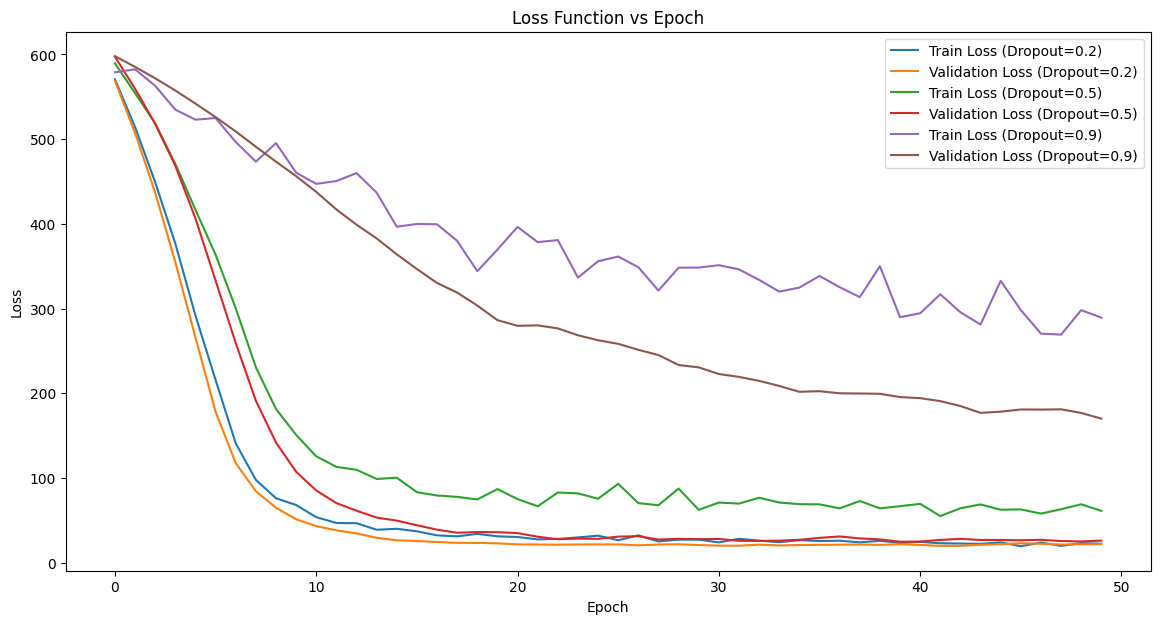

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

# Load dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalize the data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

def build_model(dropout_rate):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

dropout_rates = [0.2, 0.5,0.9]
history_dict = {}

# Train models with different dropout rates
for rate in dropout_rates:
    print(f"Training with dropout rate: {rate}")
    model = build_model(rate)
    history = History()
    history_dict[rate] = history
    model.fit(x_train, y_train, epochs=50, validation_data=(x_test,y_test), verbose=0, callbacks=[history])

# Plot training and validation loss
plt.figure(figsize=(14, 7))

for rate, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Loss (Dropout={rate})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (Dropout={rate})')

plt.title('Loss Function vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
num_samples = 1000
input_dim = 10
output_dim1 = 1
output_dim2 = 1

# Features
X = np.random.rand(num_samples, input_dim)

# Targets with two different outputs
y1 = X[:, 0] * 0.5 + np.random.rand(num_samples) * 0.1  # Example target 1
y2 = X[:, 1] * 0.7 + np.random.rand(num_samples) * 0.1  # Example target 2

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=0)

# Define the model using the Functional API
inputs = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)

# Two separate output layers for the two outputs
output1 = Dense(output_dim1, name='output1')(x)
output2 = Dense(output_dim2, name='output2')(x)

# Create the model
model = Model(inputs=inputs, outputs=[output1, output2])

# Compile the model
model.compile(optimizer='adam', loss={'output1':'mse','output2':'mse'}, metrics={'output1': 'mae', 'output2': 'mae'})

# Train the model
history = model.fit(
    X_train,
    {'output1': y1_train, 'output2': y2_train},
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model
loss, mae_output1, mae_output2 = model.evaluate(
    X_test,
    {'output1': y1_test, 'output2': y2_test}
)
print(f"Test loss: {loss:.4f}")
#print(f"Test loss for output1: {loss_output1:.4f}")
#print(f"Test loss for output2: {loss_output2:.4f}")
print(f"Test MAE for output1: {mae_output1:.4f}")
print(f"Test MAE for output2: {mae_output2:.4f}")

# Print model summary
model.summary()


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2234 - output1_mae: 0.1868 - output2_mae: 0.3345 - val_loss: 0.0642 - val_output1_mae: 0.1286 - val_output2_mae: 0.1690
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0549 - output1_mae: 0.1089 - output2_mae: 0.1562 - val_loss: 0.0311 - val_output1_mae: 0.0838 - val_output2_mae: 0.1195
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - output1_mae: 0.0725 - output2_mae: 0.1108 - val_loss: 0.0179 - val_output1_mae: 0.0531 - val_output2_mae: 0.0944
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - output1_mae: 0.0475 - output2_mae: 0.0855 - val_loss: 0.0104 - val_output1_mae: 0.0444 - val_output2_mae: 0.0692
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - output1_mae: 0.0417 - output2_mae: 0.0629 - val_loss: 0.0066 - val_output1_mae: 0.0401 - val_output2_mae: 0.0516
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - output1_mae: 0.0382 - output2_ma

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │            704 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 32)             │          2,080 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output1 (Dense)           │ (None, 1)              │             33 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output2 (Dense)           │ (None, 1)              │             33 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,552 (33.41 KB)

 Trainable params: 2,850 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,702 (22.28 KB)